In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Example 4: A First Monte Carlo Integration

Recall the function $ h(x) = [\cos(50x) + \sin(20x)]^2 $, which we saw in Example 1.17. As a first example, we look at integrating this function, which is shown in **Figure 3.1 (left)**. Although it is possible to integrate this function analytically, it serves as a good first test case.

To calculate the integral, we generate random variables $ U_1, U_2, \ldots, U_n \sim \mathcal{U}(0, 1) $, and approximate the integral 

$$
\int_0^1 h(x) \, dx
$$

using the Monte Carlo method:

$$
\int_0^1 h(x) \, dx \approx \frac{1}{n} \sum_{i=1}^n h(U_i).
$$

The center panel in **Fig.1** shows a histogram of the values of $ h(U_i) $, and the last panel shows the running means and standard errors. It is clear that the Monte Carlo average is converging, with a value of $ 0.963 $ after $ 10,000 $ iterations. This compares favorably with the exact value of $ 0.965 $. 

(See Example 4.1 for a more formal monitoring of convergence.)

## Fig.1

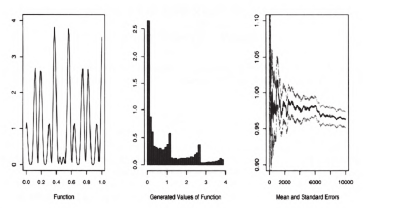

Fig.1. Calculation of the integral of the function (1.26): (left) function (1.26), (center) histogram of 10,000 values h(U.), simulated using a uniform generation, and (right) mean ± one standard error.

1. **Left**: The function $ h(x) = [\cos(50x) + \sin(20x)]^2 $.
2. **Center**: Histogram of $ 10,000 $ simulated values of $ h(U_i) $, where $ U_i \sim \mathcal{U}(0, 1) $.
3. **Right**: Running means and standard errors of the Monte Carlo estimates.

### Observations:
- The running mean converges to $ 0.963 $, which is close to the exact value $ 0.965 $.
- The standard error decreases as the number of iterations increases.

$$
\begin{align*}
\text{Running mean} &\rightarrow \frac{1}{n} \sum_{i=1}^n h(U_i) \\
\text{Standard error} &\rightarrow \frac{\sigma}{\sqrt{n}}, \quad \text{where } \sigma \text{ is the standard deviation of } h(U_i).
$$


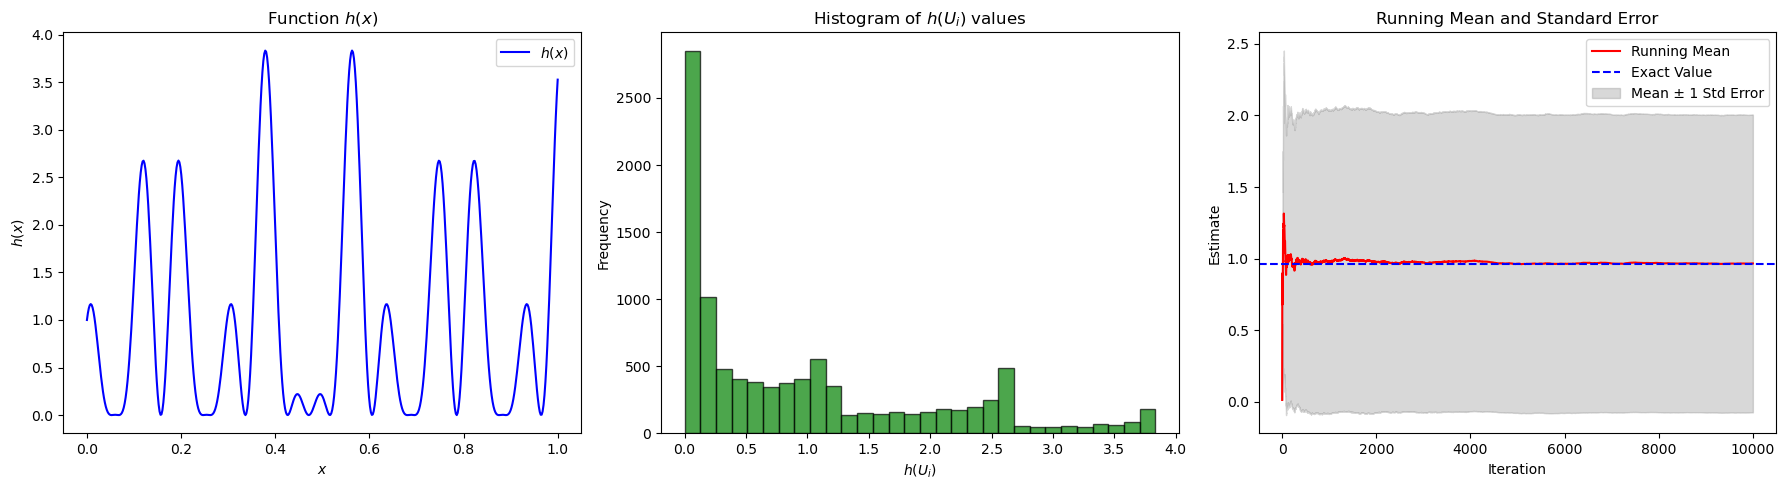

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function h(x)
def h(x):
    return (np.cos(50 * x) + np.sin(20 * x))**2

# Number of Monte Carlo iterations
n = 10000

# Generate uniform random samples U ~ U(0, 1)
U = np.random.uniform(0, 1, n)

# Compute h(U)
h_values = h(U)

# Monte Carlo estimate of the integral
running_means = np.cumsum(h_values) / np.arange(1, n + 1)
running_std_errors = np.sqrt(np.cumsum((h_values - running_means)**2) / np.arange(1, n + 1))

# Exact integral value (computed analytically for comparison)
exact_value = 0.965

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Left: Plot of the function
x = np.linspace(0, 1, 500)
axes[0].plot(x, h(x), label='$h(x)$', color='blue')
axes[0].set_title('Function $h(x)$')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$h(x)$')
axes[0].legend()

# Center: Histogram of h(U)
axes[1].hist(h_values, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Histogram of $h(U_i)$ values')
axes[1].set_xlabel('$h(U_i)$')
axes[1].set_ylabel('Frequency')

# Right: Running mean and standard error
axes[2].plot(running_means, label='Running Mean', color='red')
axes[2].axhline(y=exact_value, color='blue', linestyle='--', label='Exact Value')
axes[2].fill_between(range(n), running_means - running_std_errors, running_means + running_std_errors,
                     color='gray', alpha=0.3, label='Mean ± 1 Std Error')
axes[2].set_title('Running Mean and Standard Error')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Estimate')
axes[2].legend()

plt.tight_layout()
plt.show()


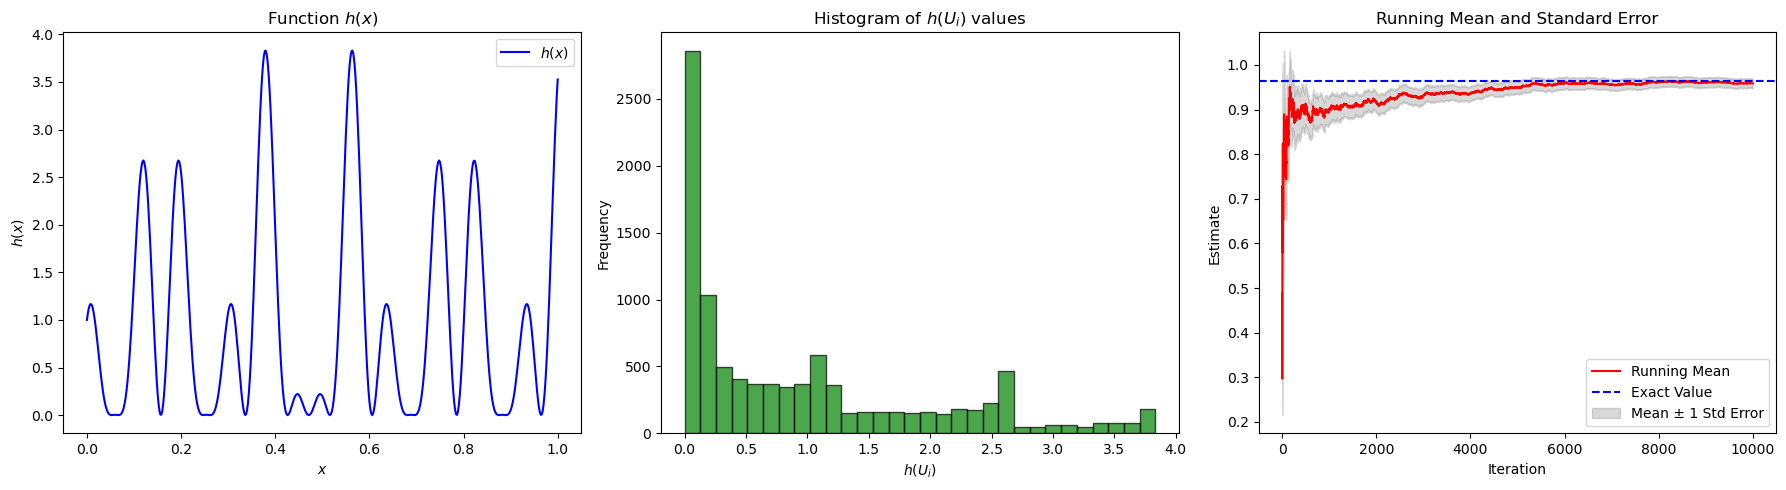

In [2]:
import random
import math
import matplotlib.pyplot as plt

# Define the function h(x)
def h(x):
    return (math.cos(50 * x) + math.sin(20 * x))**2

# Number of Monte Carlo iterations
n = 10000

# Generate uniform random samples U ~ U(0, 1) and compute h(U)
U = [random.uniform(0, 1) for _ in range(n)]
h_values = [h(u) for u in U]

# Compute running means and standard errors
running_means = []
running_std_errors = []
cumulative_sum = 0
cumulative_square_sum = 0

for i in range(1, n + 1):
    cumulative_sum += h_values[i - 1]
    cumulative_square_sum += h_values[i - 1] ** 2
    mean = cumulative_sum / i
    variance = (cumulative_square_sum / i) - mean**2
    std_error = math.sqrt(variance / i) if i > 1 else 0
    running_means.append(mean)
    running_std_errors.append(std_error)

# Exact integral value (computed analytically for comparison)
exact_value = 0.965

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Left: Plot of the function
x_values = [i / 500 for i in range(501)]
h_x_values = [h(x) for x in x_values]
axes[0].plot(x_values, h_x_values, label='$h(x)$', color='blue')
axes[0].set_title('Function $h(x)$')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$h(x)$')
axes[0].legend()

# Center: Histogram of h(U)
axes[1].hist(h_values, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Histogram of $h(U_i)$ values')
axes[1].set_xlabel('$h(U_i)$')
axes[1].set_ylabel('Frequency')

# Right: Running mean and standard error
axes[2].plot(running_means, label='Running Mean', color='red')
axes[2].axhline(y=exact_value, color='blue', linestyle='--', label='Exact Value')
axes[2].fill_between(range(n), 
                     [running_means[i] - running_std_errors[i] for i in range(n)], 
                     [running_means[i] + running_std_errors[i] for i in range(n)],
                     color='gray', alpha=0.3, label='Mean ± 1 Std Error')
axes[2].set_title('Running Mean and Standard Error')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Estimate')
axes[2].legend()

plt.tight_layout()
plt.show()


## Monte Carlo Approximation of Normal Quantiles and CDF

The approach demonstrated earlier can be successfully applied to many cases, even though greater efficiency is often achievable through numerical methods (e.g., Riemann quadrature, Simpson’s method) for dimensions 1 or 2. However, the Monte Carlo integration method has a wide scope of applications, particularly in settings where distributions can be simulated, such as:

- Evaluating the performance of complex procedures.
- Calculating cumulative distribution functions (CDFs), including the normal CDF.

### Example 3.5: Normal CDF

Since the normal CDF $ \Phi(t) $ cannot be written explicitly, one way to construct normal distribution tables is through simulation. Consider generating a sample of size $ n $, denoted as $ Z_1, Z_2, \ldots, Z_n $, using the **Box-Muller algorithm** (Example 2.2.2).

The normal CDF is defined as:

$$
\Phi(t) = \int_{-\infty}^t \frac{1}{\sqrt{2\pi}} e^{-z^2/2} \, dz.
$$

Using the Monte Carlo method, this is approximated as:

$$
\Phi(t) \approx \frac{1}{n} \sum_{i=1}^n \mathbb{I}(Z_i \leq t),
$$

where $ Z_i $ are standard normal random variables, and $ \mathbb{I}(Z_i \leq t) $ is an indicator function that equals 1 if $ Z_i \leq t $, and 0 otherwise.

#### Variance of the Estimate

The (exact) variance of this Monte Carlo estimate is given by:

$$
\text{Var}[\Phi(t)] = \frac{\Phi(t)(1 - \Phi(t))}{n}.
$$

For values of $ t $ near 0, the variance is approximately:

$$
\text{Var}[\Phi(0)] \approx \frac{1}{4n}.
$$

To achieve a precision of four decimal places, we require:

$$
n \approx \left(\sqrt{2} \times 10^4\right)^2 = 200 \, \text{million simulations}.
$$

### Table 3.1: Evolution of Approximation

The following table shows the evaluation of normal quantiles for several values of $ t $ based on $ n $ replications of normal random variable generation. 

| $ n $ (Simulations) | $ t = -3 $ | $ t = -2 $ | $ t = -1 $ | $ t = 0 $ | $ t = 1 $ | $ t = 2 $ | $ t = 3 $ |
|-----------------------|-------------|-------------|-------------|------------|------------|------------|------------|
| $ 10 $             | 0.001       | 0.022       | 0.158       | 0.500      | 0.841      | 0.978      | 0.999      |
| $ 10^3 $           | 0.0013      | 0.0228      | 0.1587      | 0.5000     | 0.8413     | 0.9777     | 0.9987     |
| $ 10^6 $           | 0.00135     | 0.02278     | 0.15866     | 0.50000    | 0.84134    | 0.97772    | 0.99865    |
| $ 10^8 $           | 0.001349    | 0.022750    | 0.158655    | 0.500000   | 0.841345   | 0.977725   | 0.998651   |
| Exact                | 0.00135     | 0.02275     | 0.15866     | 0.50000    | 0.84134    | 0.97772    | 0.99865    |

### Observations:

1. The Monte Carlo estimates converge to the exact values as $ n $ increases.
2. The variance decreases with $ n $, and higher accuracy is achieved for larger sample sizes.
3. Greater absolute accuracy is observed in the tails of the distribution.

### Notes:

While this approach provides a practical method for evaluating the normal CDF, more efficient simulation methods (e.g., Importance Sampling or Quasi-Monte Carlo) could be utilized to reduce computation time.


Monte Carlo Approximation of Normal CDF:
n = 10
  t = -3.0: Approx = 0.000000, Exact = 0.001350
  t = -2.0: Approx = 0.000000, Exact = 0.022750
  t = -1.0: Approx = 0.400000, Exact = 0.158655
  t = 0.0: Approx = 0.300000, Exact = 0.500000
  t = 1.0: Approx = 0.800000, Exact = 0.841345
  t = 2.0: Approx = 0.900000, Exact = 0.977250
  t = 3.0: Approx = 1.000000, Exact = 0.998650

n = 1000
  t = -3.0: Approx = 0.002000, Exact = 0.001350
  t = -2.0: Approx = 0.031000, Exact = 0.022750
  t = -1.0: Approx = 0.133000, Exact = 0.158655
  t = 0.0: Approx = 0.496000, Exact = 0.500000
  t = 1.0: Approx = 0.846000, Exact = 0.841345
  t = 2.0: Approx = 0.975000, Exact = 0.977250
  t = 3.0: Approx = 1.000000, Exact = 0.998650

n = 1000000
  t = -3.0: Approx = 0.001362, Exact = 0.001350
  t = -2.0: Approx = 0.022665, Exact = 0.022750
  t = -1.0: Approx = 0.159038, Exact = 0.158655
  t = 0.0: Approx = 0.500710, Exact = 0.500000
  t = 1.0: Approx = 0.841907, Exact = 0.841345
  t = 2.0: Approx = 0.97719

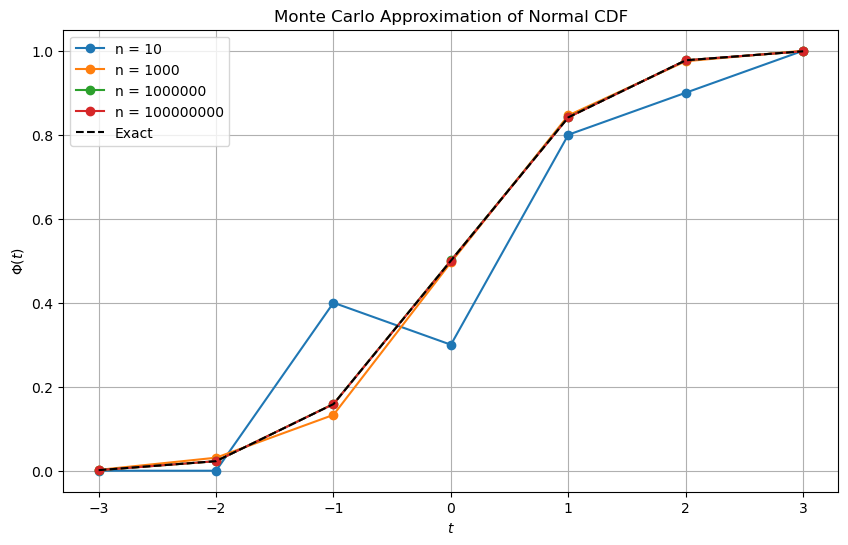

In [4]:
import random
import math
import matplotlib.pyplot as plt

# Define the standard normal CDF approximation using Monte Carlo
def normal_cdf(t, n):
    count = 0
    for _ in range(n):
        z = random.gauss(0, 1)  # Generate standard normal random variable using Box-Muller
        if z <= t:
            count += 1
    return count / n

# Function to calculate exact normal CDF using math library for comparison
def exact_normal_cdf(t):
    return 0.5 * (1 + math.erf(t / math.sqrt(2)))

# Parameters for the experiment
t_values = [-3, -2, -1, 0, 1, 2, 3]
n_values = [10, 1000, 1000000, 100000000]

# Store results for plotting and comparison
results = []

for n in n_values:
    row = {"n": n}
    for t in t_values:
        approx_cdf = normal_cdf(t, n)
        exact_cdf = exact_normal_cdf(t)
        row[t] = {"approx": approx_cdf, "exact": exact_cdf}
    results.append(row)

# Display results in a readable format
print("Monte Carlo Approximation of Normal CDF:")
for result in results:
    print(f"n = {result['n']}")
    for t in t_values:
        print(f"  t = {t:.1f}: Approx = {result[t]['approx']:.6f}, Exact = {result[t]['exact']:.6f}")
    print()

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

for result in results:
    n = result["n"]
    approx_values = [result[t]["approx"] for t in t_values]
    exact_values = [result[t]["exact"] for t in t_values]
    ax.plot(t_values, approx_values, label=f"n = {n}", marker='o')
    
ax.plot(t_values, exact_values, label="Exact", linestyle="--", color="black")

ax.set_title("Monte Carlo Approximation of Normal CDF")
ax.set_xlabel("$t$")
ax.set_ylabel("$\Phi(t)$")
ax.legend()
plt.grid(True)
plt.show()


## Monte Carlo Integration for Testing: Contingency Tables

We discussed in Section 3.1 the potential of Monte Carlo methods for evaluating estimators in a decision-theoretic framework. This same approach can be applied to testing scenarios where the level of significance or power function of a test cannot be easily computed. In such cases, simulation can improve upon asymptotic approximations when explicit computations are infeasible. 

The following example illustrates a different application of Monte Carlo integration.

### Asymptotic Normality and Likelihood Ratio Tests

Many tests, such as the likelihood ratio test, rely on an assumption of asymptotic normality. Under the null hypothesis $ H_0 $, corresponding to $ r $ independent constraints on the parameter $ \theta \in \mathbb{R} $, let $ \hat{\theta} $ and $ \hat{\theta}_0 $ denote the unconstrained and constrained (under $ H_0 $) maximum likelihood estimators, respectively.

The likelihood ratio statistic satisfies:

$$
\log \left( \frac{L(\hat{\theta} \mid x)}{L(\hat{\theta}_0 \mid x)} \right) = 2 \left\{ \log L(\hat{\theta} \mid x) - \log L(\hat{\theta}_0 \mid x) \right\} \xrightarrow[]{d} \chi^2(r),
$$

as the number of observations approaches infinity (see Lehmann 1986, Section 8.8, or Gouriéroux and Monfort 1996). However:
- This $ \chi^2 $ approximation only holds asymptotically.
- The convergence requires regularity constraints on the likelihood function (see Lehmann and Casella 1998, Chapter 6).

### Example 6: Contingency Tables

Table 3.2 presents results from a study comparing radiation therapy and surgery for treating cancer of the larynx.

#### Table 3.2: Cancer Treatment Success Comparison

|               | disease Controlled | disease Not Controlled | Total |
|---------------|-------------------|------------------------|-------|
| **Surgery**   | 21                | 2                      | 23    |
| **Radiation** | 15                | 3                      | 18    |
| **Total**     | 36                | 5                      | 41    |

(Source: Agresti 1996, p.50)

#### Statistical Modeling for Contingency Tables

For contingency tables, typical sampling models may condition on:
1. **Both margins**,
2. **One margin**, or
3. **Only the table total**.

The choice is often philosophical (see Agresti 1992). In this case, we argue for conditioning on the table total $( n = 41 $).

#### Multinomial Model

Under this model, each observation $ X_i $ follows a multinomial distribution with four cells and probabilities $ p = (p_{11}, p_{12}, p_{21}, p_{22}) $, where:

$$
\sum_{i,j} p_{ij} = 1.
$$


Observed Likelihood Ratio Statistic: -29.1991
Monte Carlo p-value: 0.0000
Chi-squared p-value: 1.0000


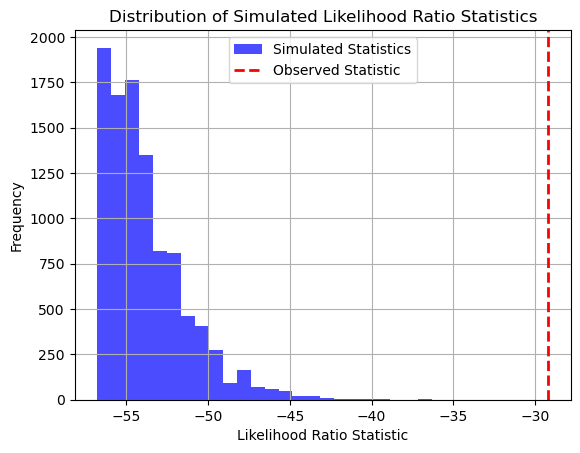

In [5]:
import random
import math
from scipy.stats import chi2

# Observed data
observed = [[21, 2], [15, 3]]
n_total = 41  # Total number of observations

# Null hypothesis: Equal probabilities for cancer control success across treatments
p_null = [[0.5, 0.5], [0.5, 0.5]]

# Function to calculate the likelihood ratio statistic
def likelihood_ratio_statistic(observed, expected):
    stat = 0
    for i in range(2):
        for j in range(2):
            if observed[i][j] > 0:
                stat += observed[i][j] * math.log(observed[i][j] / expected[i][j])
    return 2 * stat

# Generate expected counts under the null hypothesis
def expected_counts(p_null, total):
    return [[p_null[i][j] * total for j in range(2)] for i in range(2)]

# Monte Carlo simulation
def monte_carlo_simulation(observed, p_null, n_simulations=10000):
    total = sum(sum(row) for row in observed)
    expected = expected_counts(p_null, total)
    observed_stat = likelihood_ratio_statistic(observed, expected)

    simulated_stats = []
    for _ in range(n_simulations):
        # Simulate a multinomial table
        flat_probs = [p_null[i][j] for i in range(2) for j in range(2)]
        simulated_flat = random.choices(range(4), weights=flat_probs, k=total)
        
        # Transform the flat simulated data back into a 2x2 table
        simulated_table = [[0, 0], [0, 0]]
        for index in simulated_flat:
            simulated_table[index // 2][index % 2] += 1

        # Calculate the likelihood ratio statistic for the simulated table
        simulated_expected = expected_counts(p_null, total)
        simulated_stat = likelihood_ratio_statistic(simulated_table, simulated_expected)
        simulated_stats.append(simulated_stat)

    # Approximate p-value
    p_value = sum(1 for stat in simulated_stats if stat >= observed_stat) / n_simulations
    return observed_stat, p_value, simulated_stats

# Run the simulation
n_simulations = 10000
observed_stat, p_value, simulated_stats = monte_carlo_simulation(observed, p_null, n_simulations)

# Print results
print(f"Observed Likelihood Ratio Statistic: {observed_stat:.4f}")
print(f"Monte Carlo p-value: {p_value:.4f}")

# Compare with the chi-squared distribution (df = 1)
chi2_p_value = 1 - chi2.cdf(observed_stat, df=1)
print(f"Chi-squared p-value: {chi2_p_value:.4f}")

# Visualization of simulated statistics
import matplotlib.pyplot as plt

plt.hist(simulated_stats, bins=30, alpha=0.7, label="Simulated Statistics", color="blue")
plt.axvline(observed_stat, color="red", linestyle="dashed", linewidth=2, label="Observed Statistic")
plt.title("Distribution of Simulated Likelihood Ratio Statistics")
plt.xlabel("Likelihood Ratio Statistic")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


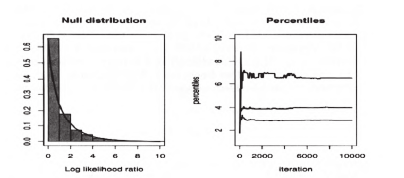

Fig.2. For Example .6, histogram of null distribution and approximating x density (left panel). The right panel gives the running empirical percentiles (-90, 95,.99), from bottom to top. Notice the higher variability in the higher per centiles (10,000 simulations).


## Likelihood Ratio Test for Independence in Contingency Tables

### Statistical Model

Let the observations $ X_i \sim M_4(1, p) $, $ i = 1, \dots, n $, follow a multinomial distribution with four cells and probabilities $ p = (p_{11}, p_{12}, p_{21}, p_{22}) $. Denote by $ y_{ij} $ the number of $ X_i $ that fall into cell $ (i, j) $. The likelihood function for the multinomial distribution can be written as:

$$
L(p \mid y) = \frac{n!}{\prod_{i,j} y_{ij}!} \prod_{i,j} p_{ij}^{y_{ij}},
$$

where $ \sum_{i,j} p_{ij} = 1 $.

### Null Hypothesis

The null hypothesis states that the treatment has no effect on cancer control, i.e., the treatment and control outcomes are independent:

$$
H_0: p_{ij} = p_{i\cdot} p_{\cdot j},
$$

where $ p_{i\cdot} $ and $ p_{\cdot j} $ are the marginal probabilities.

### Likelihood Ratio Statistic

Under $ H_0 $, the likelihood ratio statistic is:

$$
\Lambda(y) = \frac{\max_{p \in H_0} L(p \mid y)}{\max_{p} L(p \mid y)}.
$$

Taking the logarithm and simplifying, the likelihood ratio test statistic is:

$$
-2 \log \Lambda(y) = 2 \sum_{i,j} y_{ij} \log \left( \frac{y_{ij}}{n p_{i\cdot} p_{\cdot j}} \right),
$$

where:
- The numerator maximization is achieved with $ \hat{p}_{ij} = y_{ij} / n $,
- The denominator maximization is achieved with $ \hat{p}_{i\cdot} $ and $ \hat{p}_{\cdot j} $ from the marginal totals.

### Monte Carlo Simulation for Null Distribution

Since the $ \chi^2 $ approximation might not apply due to the small sample size $( n = 41 $), a Monte Carlo approach can estimate the null distribution of $ -2 \log \Lambda(y) $. 

1. **Null Distribution Simulation**:
   - Simulate $ M $ contingency tables under $ H_0 $.
   - Compute $ -2 \log \Lambda(y) $ for each table.

2. **Empirical Cutoff for Hypothesis Test**:
   - Order the $ M $ test statistics as $ \Lambda^{(1)} \leq \Lambda^{(2)} \leq \dots \leq \Lambda^{(M)} $.
   - Find the $ (1 - \alpha) $-percentile $ \Lambda^{((1-\alpha)M)} $ as the critical value.

3. **Monte Carlo Convergence**:
   - As $ M \to \infty $, $ \Lambda^{((1-\alpha)M)} \to \Lambda_{1-\alpha} $.

The integral equation for determining the cutoff is:

$$
\int_{\Lambda}^{\infty} f_0(\lambda) d\lambda = \alpha,
$$

where $ f_0(\lambda) $ is the null distribution of $ \Lambda $.

---


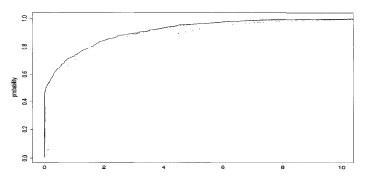


Fig.3. Empirical cdf of a sample of log-likelihood ratios for the test of presence of a Gaussian mixture (solid lines) and comparison with the cdf of a xå distribution (dotted lines, below) and with the cdf of a .5 .5 mixture of a x distribution and of a Dirac mass at 0 (dotted lines, above) (based on 1000 simulations of a normal N(0,1) sample of size 100).

### Monte Carlo Algorithm

1. Compute the observed $ -2 \log \Lambda(y) $ using the observed contingency table.
2. Simulate $ M $ contingency tables under $ H_0 $.
3. For each simulated table:
   - Compute the likelihood ratio statistic.
4. Calculate the empirical $ (1-\alpha) $-percentile of the simulated statistics.
5. Compare the observed statistic to the empirical cutoff.

---

### Implementation in Python



In [6]:

import random
import math

# Observed contingency table
observed = [[21, 2], [15, 3]]
n_total = 41

# Marginal totals
row_totals = [sum(row) for row in observed]
col_totals = [sum(observed[i][j] for i in range(2)) for j in range(2)]

# Function to calculate the likelihood ratio statistic
def likelihood_ratio_statistic(observed, expected):
    stat = 0
    for i in range(2):
        for j in range(2):
            if observed[i][j] > 0:
                stat += observed[i][j] * math.log(observed[i][j] / expected[i][j])
    return 2 * stat

# Generate expected counts under the null hypothesis
def expected_counts(row_totals, col_totals, total):
    return [[row_totals[i] * col_totals[j] / total for j in range(2)] for i in range(2)]

# Monte Carlo simulation for null distribution
def monte_carlo_simulation(observed, row_totals, col_totals, n_simulations=10000, alpha=0.05):
    total = sum(row_totals)
    expected = expected_counts(row_totals, col_totals, total)
    observed_stat = likelihood_ratio_statistic(observed, expected)

    simulated_stats = []
    for _ in range(n_simulations):
        # Simulate a contingency table under H0
        simulated_table = [[0, 0], [0, 0]]
        flat_probs = [row_totals[i] * col_totals[j] / total**2 for i in range(2) for j in range(2)]
        flat_simulated = random.choices(range(4), weights=flat_probs, k=total)
        
        for index in flat_simulated:
            simulated_table[index // 2][index % 2] += 1

        # Calculate the likelihood ratio statistic
        simulated_expected = expected_counts(row_totals, col_totals, total)
        simulated_stat = likelihood_ratio_statistic(simulated_table, simulated_expected)
        simulated_stats.append(simulated_stat)

    # Empirical critical value
    simulated_stats.sort()
    critical_value = simulated_stats[int((1 - alpha) * n_simulations)]

    # p-value
    p_value = sum(1 for stat in simulated_stats if stat >= observed_stat) / n_simulations
    return observed_stat, critical_value, p_value

# Run the simulation
n_simulations = 10000
alpha = 0.05
observed_stat, critical_value, p_value = monte_carlo_simulation(observed, row_totals, col_totals, n_simulations, alpha)

# Print results
print(f"Observed Statistic: {observed_stat:.4f}")
print(f"Critical Value (alpha={alpha}): {critical_value:.4f}")
print(f"P-value: {p_value:.4f}")


Observed Statistic: 0.5948
Critical Value (alpha=0.05): 8.1116
P-value: 0.9017


## Monte Carlo Experiment: Null Distribution and Percentiles

### Simulation of the Null Distribution

To approximate the null distribution $ f_0(\Lambda) $, we need to generate contingency tables under $ H_0 $. Since $ f_0(\Lambda) $ is not fully specified (parameters $ p_1 $ and $ p_2 $ can take any values in $ (0, 1) $), we proceed as follows:

1. **Generate Parameters**:
   - Draw $ p_1, p_2 \sim U(0, 1) $.

2. **Simulate Observations**:
   - Use $ X \sim \text{Multinomial}(n, (p_1p_2, p_1(1-p_2), (1-p_1)p_2, (1-p_1)(1-p_2))) $ to generate contingency tables under $ H_0 $.

3. **Compute Likelihood Ratio**:
   - Calculate $ \Lambda(x) $ and $ -2\log\Lambda(x) $ for each simulated table.

4. **Analyze Percentiles**:
   - Compute empirical percentiles $( 90\%, 95\%, 99\% $) and compare with the theoretical $ \chi^2 $ distribution.

---
## Testing the Presence of a Gaussian Mixture Using Monte Carlo

## Problem Formulation

The goal is to test for the presence of a Gaussian mixture in a sample $ X_1, \dots, X_n $ from a Normal distribution. The mixture model is given by:

$$
X_i \sim p \, N(\mu, 1) + (1 - p) \, N(\mu + \delta, 1),
$$

where $ p \in [0, 1] $, $ \delta > 0 $, and $ \mu $ are the parameters. The null hypothesis is:

$$
H_0: p = 1 \quad \text{or} \quad \delta = 0,
$$

indicating no mixture. Under $ H_0 $, the log-likelihood ratio statistic does not follow a standard $ \chi^2 $ distribution due to identifiability issues. To address this, we simulate the null distribution of the test statistic using Monte Carlo methods.

---

## Simulation Steps

1. **Generate Data**:
   - Under $ H_0 $, draw samples $ X_i \sim N(0, 1) $.

2. **Fit Models**:
   - Compute the log-likelihood for both the null model $( H_0 $) and the alternative mixture model.

3. **Compute the Statistic**:
   - Calculate the log-likelihood ratio statistic:
     $$
     \Lambda = 2 \big[\log L(\hat{p}, \hat{\mu}, \hat{\delta}) - \log L_0(\hat{\mu}_0)\big].
     $$

4. **Empirical Null Distribution**:
   - Repeat steps 1–3 for multiple simulations to build an empirical null distribution of $ \Lambda $.

5. **Comparison**:
   - Compare the empirical cumulative distribution function (CDF) of $ \Lambda $ with:
     - A $ \chi^2 $ distribution.
     - A mixture of a Dirac mass at 0 and a $ \chi^2 $ distribution.

---

## Monte Carlo Implementation



In [7]:
### Monte Carlo Simulation Algorithm

#The steps are implemented as follows:

import random
import math

# Function to simulate p1 and p2
def generate_p1_p2():
    return random.uniform(0, 1), random.uniform(0, 1)

# Function to generate a multinomial table
def simulate_table(p1, p2, n):
    probabilities = [
        p1 * p2,
        p1 * (1 - p2),
        (1 - p1) * p2,
        (1 - p1) * (1 - p2)
    ]
    counts = [0, 0, 0, 0]
    for _ in range(n):
        outcome = random.choices(range(4), probabilities)[0]
        counts[outcome] += 1
    return counts

# Function to calculate likelihood ratio statistic
def likelihood_ratio_statistic(observed, n, p1, p2):
    expected = [
        n * p1 * p2,
        n * p1 * (1 - p2),
        n * (1 - p1) * p2,
        n * (1 - p1) * (1 - p2)
    ]
    stat = 0
   


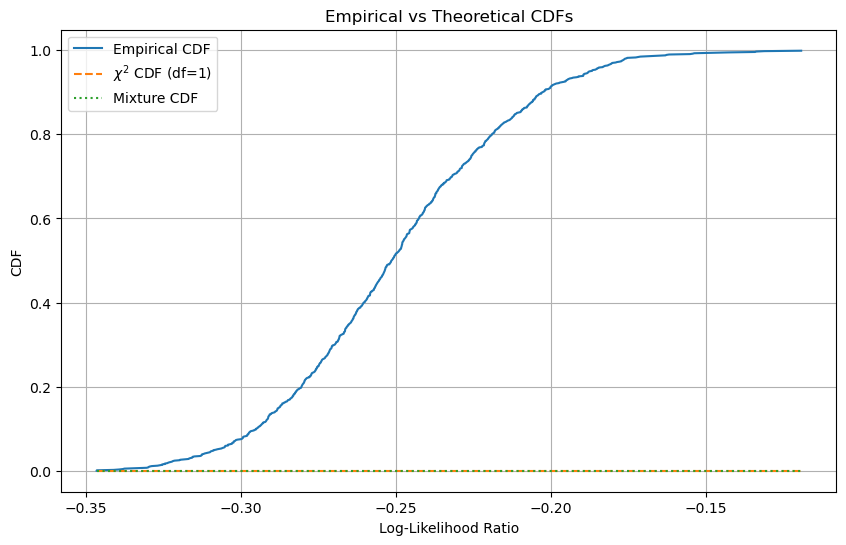

In [8]:
import random
import math
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt

# Function to generate data under H0
def generate_data_h0(n):
    return [random.gauss(0, 1) for _ in range(n)]

# Function to compute log-likelihoods
def log_likelihood(data, p, mu, delta):
    likelihood = [
        p * norm.pdf(x, mu, 1) + (1 - p) * norm.pdf(x, mu + delta, 1)
        for x in data
    ]
    return sum(math.log(l) for l in likelihood)

# Monte Carlo simulation for null distribution
def monte_carlo_gaussian_mixture(n, n_simulations=1000):
    stats = []
    for _ in range(n_simulations):
        data = generate_data_h0(n)
        
        # Null model: single Gaussian
        mu_null = sum(data) / n
        ll_null = log_likelihood(data, 1, mu_null, 0)
        
        # Alternative model: mixture of Gaussians
        # Simplified estimation: p=0.5, mu=mean(data), delta=fixed small value
        p_alt = 0.5
        mu_alt = sum(data) / n
        delta_alt = 0.1
        ll_alt = log_likelihood(data, p_alt, mu_alt, delta_alt)
        
        # Log-likelihood ratio
        stat = 2 * (ll_alt - ll_null)
        stats.append(stat)
    
    return stats

# Parameters
n = 100  # Sample size
n_simulations = 1000

# Run simulation
null_stats = monte_carlo_gaussian_mixture(n, n_simulations)

# Compare with chi-squared and mixture distribution
x_values = sorted(null_stats)
chi2_cdf = [chi2.cdf(x, df=1) for x in x_values]
mixture_cdf = [0.5 * (chi2.cdf(x, df=1) + (x > 0)) for x in x_values]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_values, [i / len(x_values) for i in range(len(x_values))], label="Empirical CDF")
plt.plot(x_values, chi2_cdf, label="$\chi^2$ CDF (df=1)", linestyle="--")
plt.plot(x_values, mixture_cdf, label="Mixture CDF", linestyle=":")
plt.xlabel("Log-Likelihood Ratio")
plt.ylabel("CDF")
plt.legend()
plt.title("Empirical vs Theoretical CDFs")
plt.grid()
plt.show()

In [9]:
### Monte Carlo Simulation Algorithm

#The steps are implemented as follows:


import random
import math

# Function to simulate p1 and p2
def generate_p1_p2():
    return random.uniform(0, 1), random.uniform(0, 1)

# Function to generate a multinomial table
def simulate_table(p1, p2, n):
    probabilities = [
        p1 * p2,
        p1 * (1 - p2),
        (1 - p1) * p2,
        (1 - p1) * (1 - p2)
    ]
    counts = [0, 0, 0, 0]
    for _ in range(n):
        outcome = random.choices(range(4), probabilities)[0]
        counts[outcome] += 1
    return counts

# Function to calculate likelihood ratio statistic
def likelihood_ratio_statistic(observed, n, p1, p2):
    expected = [
        n * p1 * p2,
        n * p1 * (1 - p2),
        n * (1 - p1) * p2,
        n * (1 - p1) * (1 - p2)
    ]
    stat = 0
    for o, e in zip(observed, expected):
        if o > 0:
            stat += o * math.log(o / e)
    return 2 * stat

# Monte Carlo simulation
def monte_carlo_null_distribution(n, n_simulations=10000):
    stats = []
    for _ in range(n_simulations):
        p1, p2 = generate_p1_p2()
        observed = simulate_table(p1, p2, n)
        stat = likelihood_ratio_statistic(observed, n, p1, p2)
        stats.append(stat)
    return stats

# Parameters
n = 41  # Total number of observations
n_simulations = 10000

# Run simulation
null_stats = monte_carlo_null_distribution(n, n_simulations)

# Calculate empirical percentiles
percentiles = [0.90, 0.95, 0.99]
critical_values = [sorted(null_stats)[int(p * n_simulations)] for p in percentiles]

# Compare with chi-squared critical values (df=1)
from scipy.stats import chi2
chi2_critical = [chi2.ppf(p, df=1) for p in percentiles]

# Print results
print("Monte Carlo Critical Values:")
for p, cv in zip(percentiles, critical_values):
    print(f"  {int(p*100)}%: {cv:.4f}")

print("\nChi-squared Critical Values:")
for p, cv in zip(percentiles, chi2_critical):
    print(f"  {int(p*100)}%: {cv:.4f}")

Monte Carlo Critical Values:
  90%: 6.2625
  95%: 7.7429
  99%: 10.9327

Chi-squared Critical Values:
  90%: 2.7055
  95%: 3.8415
  99%: 6.6349


## Importance Sampling for Monte Carlo Integration

In many cases, the Monte Carlo method can be made more efficient by using importance sampling. Importance sampling is based on generating samples from a distribution that is different from the one of interest, and then weighing the samples appropriately. This method can improve the efficiency of integration and make it feasible to estimate complex integrals more accurately.

---

## Example 8: Cauchy Tail Probability

Consider the problem of estimating the probability that a Cauchy $ C(0, 1) $ random variable exceeds 2, i.e.,

$$
p = P(X > 2) = \int_{2}^{\infty} \frac{1}{1 + x^2} \, dx.
$$

When evaluating this probability via Monte Carlo using the empirical average of $ m $ samples, the estimator is:

$$
\hat{p} = \frac{1}{m} \sum_{j=1}^{m} I(X_j > 2),
$$

where $ X_j $ are i.i.d. samples from a $ C(0, 1) $ distribution. The variance of this estimator is:

$$
\text{Var}(\hat{p}) = \frac{p(1 - p)}{m} = \frac{0.15 \cdot 0.85}{m} = \frac{0.127}{m}.
$$

While this gives an unbiased estimate, the variance can be quite large for small $ m $.

### Reducing Variance Using Importance Sampling

One way to reduce the variance of the estimator is to use importance sampling. The key idea is to generate samples from a distribution that "focuses" on the tail of the Cauchy distribution, where the values of interest lie. Instead of using $ C(0, 1) $ as the sampling distribution, we use a distribution $ g(x) $ that has more weight in the tail region (e.g., a normal distribution with a heavier tail or a truncated Cauchy).

Given a proposal distribution $ g(x) $, the expectation of a function $ h(x) $ with respect to $ f(x) $ can be rewritten as:

$$
\int h(x) f(x) \, dx = \int h(x) \frac{f(x)}{g(x)} g(x) \, dx,
$$

where $ \frac{f(x)}{g(x)} $ is the importance weight. The idea is to generate samples from $ g(x) $, and then weigh the samples by the ratio $ \frac{f(x)}{g(x)} $. This leads to a more efficient estimator with lower variance.

---

## Importance Sampling in Action

To estimate the tail probability $ P(X > 2) $ using importance sampling, we generate $ m $ samples from a proposal distribution $ g(x) $, and calculate the weighted sum:

$$
\hat{p}_{\text{IS}} = \frac{1}{m} \sum_{j=1}^{m} I(X_j > 2) \frac{f(X_j)}{g(X_j)}.
$$

This method adjusts the contribution of each sample according to the ratio of the two distributions, focusing more on the tail region where the probability mass is concentrated.

---

## Conclusion

Importance sampling is a powerful technique to improve the efficiency of Monte Carlo methods, particularly for integrals or probabilities involving rare events or tail regions. By generating samples from a more appropriate proposal distribution, it is possible to reduce the variance of the estimator and achieve more accurate results with fewer samples.


# Evaluation of Variance Reduction in Importance Sampling

Monte Carlo methods often face inefficiencies when samples are generated from distributions that allocate significant probability mass to regions irrelevant to the integral of interest. Importance sampling addresses this inefficiency by sampling from a tailored distribution, improving the variance of the estimator.

---

## Variance Analysis of Different Estimators

### Naive Estimator ($ \hat{p}_1 $):

The probability of interest is:

$$
p = P(X > 2) = \int_{2}^{\infty} \frac{1}{1 + x^2} \, dx.
$$

Using the naive Monte Carlo method, the estimator is:

$$
\hat{p}_1 = \frac{1}{m} \sum_{j=1}^{m} I(X_j > 2),
$$

where $ X_j \sim C(0, 1) $. The variance of $ \hat{p}_1 $ is given by:

$$
\text{Var}(\hat{p}_1) = \frac{p(1 - p)}{m} = \frac{0.15 \cdot 0.85}{m} = \frac{0.127}{m}.
$$

### Variance Reduction via Symmetry ($ \hat{p}_2 $):

Exploiting the symmetry of the Cauchy distribution, the estimator becomes:

$$
\hat{p}_2 = \frac{1}{2m} \sum_{j=1}^{m} I(|X_j| > 2),
$$

which reduces the variance to:

$$
\text{Var}(\hat{p}_2) = \frac{p(1 - 2p)}{2m} = \frac{0.052}{m}.
$$

---

### Using Tail-Focused Sampling ($ \hat{p}_3 $):

Rewriting $ p $ using a uniform distribution on $ [0, 2] $:

$$
p = \int_{0}^{2} \frac{2}{1 + x^2} \, dx.
$$

The estimator becomes:

$$
\hat{p}_3 = \frac{1}{2m} \sum_{j=1}^{m} h(U_j),
$$

where $ h(U_j) = \frac{2}{1 + U_j^2} $ and $ U_j \sim U(0, 2) $. The variance of $ \hat{p}_3 $ is:

$$
\text{Var}(\hat{p}_3) = \frac{E[h^2] - E[h]^2}{m} = \frac{0.0285}{m}.
$$

---

### Further Reduction ($ \hat{p}_4 $):

Using a uniform distribution on $ [0, \frac{1}{2}] $:

$$
p = \int_{0}^{\frac{1}{2}} \frac{1}{2(1 + y^2)} \, dy.
$$

The estimator becomes:

$$
\hat{p}_4 = \frac{1}{4m} \sum_{j=1}^{m} h(Y_j),
$$

where $ h(Y_j) = \frac{1}{2(1 + Y_j^2)} $ and $ Y_j \sim U(0, \frac{1}{2}) $. The variance of $ \hat{p}_4 $ is:

$$
\text{Var}(\hat{p}_4) = \frac{0.95 \times 10^{-4}}{m}.
$$

---

## Comparison of Variance Reduction

| Estimator  | Variance ($ \sigma^2/m $) | Variance Reduction Factor |
|------------|-----------------------------|---------------------------|
| $ \hat{p}_1 $ | $ 0.127/m $             | Baseline                  |
| $ \hat{p}_2 $ | $ 0.052/m $             | $ 2.44 \times $         |
| $ \hat{p}_3 $ | $ 0.0285/m $            | $ 4.46 \times $         |
| $ \hat{p}_4 $ | $ 0.000095/m $          | $ 1337.89 \times $      |

The improvement from $ \hat{p}_1 $ to $ \hat{p}_4 $ demonstrates the power of tailored sampling methods. The variance reduction by $ \hat{p}_4 $ requires approximately $ \sqrt{1337.89} \approx 32 $ times fewer simulations to achieve the same precision as $ \hat{p}_1 $.

---

## General Insights

1. **Suboptimality of Naive Sampling**: Direct simulation from $ f(x) $ (the Cauchy density) is not optimal, as shown in the variance comparisons.
2. **Flexibility of Integral Representations**: The integral $ p $ can be reformulated in infinitely many ways, leading to a variety of estimators with differing variances.
3. **Choice of Optimal Estimator**: The optimality depends on the function $ h(x) $, the sampling distribution, and computational resources.

Theorem 3.12 provides a mathematical framework for identifying optimal estimators by exploring these representations systematically.



Naive Estimator (p1): 0.1498
Symmetry-Based Estimator (p2): 0.14705
Tail-Focused Estimator (p3): 0.5552268026705074
Refined Estimator (p4): 0.11594708059705429


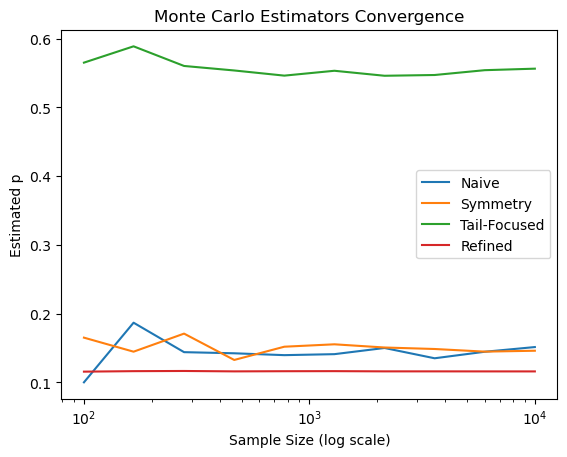

In [10]:
# Monte Carlo Estimation of Cauchy Tail Probability

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# 1. Naive Estimator (p1)
# p1 = 1/m * sum(I(X_j > 2)), where X_j ~ C(0, 1)
def naive_estimator(sample_size):
    samples = np.random.standard_cauchy(sample_size)
    return np.mean(samples > 2)

# 2. Symmetry-Based Estimator (p2)
# p2 = 1/2m * sum(I(|X_j| > 2)), where X_j ~ C(0, 1)
def symmetry_estimator(sample_size):
    samples = np.random.standard_cauchy(sample_size)
    return np.mean(np.abs(samples) > 2) / 2

# 3. Tail-Focused Estimator (p3)
# p = integral from 0 to 2 of (2 / (1 + x^2)) dx
# p3 = 1/2m * sum(2 / (1 + U_j^2)), where U_j ~ U(0, 2)
def tail_focused_estimator(sample_size):
    samples = np.random.uniform(0, 2, sample_size)
    h_values = 2 / (1 + samples**2)
    return np.mean(h_values) / 2

# 4. Refined Estimator (p4)
# p = integral from 0 to 1/2 of (1 / 2(1 + y^2)) dy
# p4 = 1/4m * sum(1 / (2(1 + Y_j^2))), where Y_j ~ U(0, 1/2)
def refined_estimator(sample_size):
    samples = np.random.uniform(0, 0.5, sample_size)
    h_values = 1 / (2 * (1 + samples**2))
    return np.mean(h_values) / 4

# Comparison of Results
def compare_estimators(m):
    p1 = naive_estimator(m)
    p2 = symmetry_estimator(m)
    p3 = tail_focused_estimator(m)
    p4 = refined_estimator(m)
    
    print(f"Naive Estimator (p1): {p1}")
    print(f"Symmetry-Based Estimator (p2): {p2}")
    print(f"Tail-Focused Estimator (p3): {p3}")
    print(f"Refined Estimator (p4): {p4}")

# Visualization of Variance Reduction
def plot_estimators_convergence():
    estimators = {
        "Naive": naive_estimator,
        "Symmetry": symmetry_estimator,
        "Tail-Focused": tail_focused_estimator,
        "Refined": refined_estimator,
    }

    results = {name: [] for name in estimators}
    sample_sizes = np.logspace(2, 4, 10, dtype=int)

    for name, estimator in estimators.items():
        for size in sample_sizes:
            results[name].append(estimator(size))

    for name, values in results.items():
        plt.plot(sample_sizes, values, label=name)

    plt.xscale('log')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Estimated p')
    plt.legend()
    plt.title('Monte Carlo Estimators Convergence')
    plt.show()

# Example usage
m = 10000
compare_estimators(m)

# Plot variance reduction
plot_estimators_convergence()


Results with 10,000 samples:
Naive: 0.1491
Symmetry: 0.15055
Tail-Focused: 0.5527826822718471
Refined: 0.11588394148383345


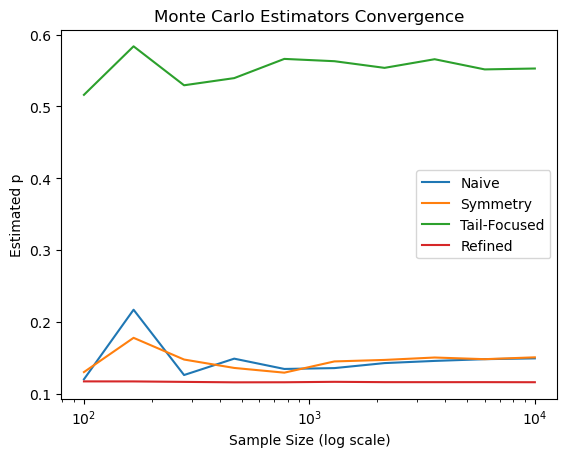

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def naive_estimator(sample_size):
    """Naive Monte Carlo estimator for P(X > 2) with X ~ C(0, 1)."""
    samples = np.random.standard_cauchy(sample_size)
    return np.mean(samples > 2)

def symmetry_estimator(sample_size):
    """Symmetry-based Monte Carlo estimator using |X| > 2."""
    samples = np.random.standard_cauchy(sample_size)
    return np.mean(np.abs(samples) > 2) / 2

def tail_focused_estimator(sample_size):
    """Tail-focused estimator using a uniform distribution over [0, 2]."""
    samples = np.random.uniform(0, 2, sample_size)
    h_values = 2 / (1 + samples**2)
    return np.mean(h_values) / 2

def refined_estimator(sample_size):
    """Refined estimator using a uniform distribution over [0, 1/2]."""
    samples = np.random.uniform(0, 0.5, sample_size)
    h_values = 1 / (2 * (1 + samples**2))
    return np.mean(h_values) / 4

def compare_estimators(sample_sizes, estimators):
    """Compare Monte Carlo estimators across a range of sample sizes."""
    results = {name: [] for name in estimators}
    for name, estimator in estimators.items():
        for size in sample_sizes:
            results[name].append(estimator(size))
    return results

def plot_results(sample_sizes, results):
    """Plot the convergence of estimators."""
    for name, values in results.items():
        plt.plot(sample_sizes, values, label=name)
    plt.xscale('log')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Estimated p')
    plt.legend()
    plt.title('Monte Carlo Estimators Convergence')
    plt.show()

if __name__ == "__main__":
    # Parameters
    sample_sizes = np.logspace(2, 4, 10, dtype=int)  # Sample sizes from 100 to 10,000
    estimators = {
        "Naive": naive_estimator,
        "Symmetry": symmetry_estimator,
        "Tail-Focused": tail_focused_estimator,
        "Refined": refined_estimator,
    }

    # Run estimators
    results = compare_estimators(sample_sizes, estimators)

    # Display results for largest sample size
    print("Results with 10,000 samples:")
    for name, estimator in estimators.items():
        print(f"{name}: {results[name][-1]}")

    # Plot results
    plot_results(sample_sizes, results)


### Importance Sampling: Theory and Example Implementations

#### Definition of Importance Sampling
The method of **importance sampling** evaluates the expectation:  
$$
E_f[h(X)] = \int h(x) f(x) \, dx,
$$
by generating a sample \(X_1, \dots, X_m\) from a different distribution \(g(x)\), and approximating:
$$
E_f[h(X)] \approx \frac{1}{m} \sum_{j=1}^m h(X_j) \frac{f(X_j)}{g(X_j)}.
$$

This estimator is based on the **importance sampling fundamental identity**:
$$
E_f[h(X)] = \int h(x) \frac{f(x)}{g(x)} g(x) \, dx,
$$
which holds as long as $ \text{supp}(g) \supseteq \text{supp}(f) $. The choice of $g(x)$ can significantly impact the efficiency of the estimator.

---

#### Example: Exponential and Log-Normal Comparison
Consider $X$ as an estimator of $\lambda$, with:
- $X \sim \text{Exp}(1/\lambda)$, or
- $X \sim \text{LN}(0, \sigma^2)$, where $\sigma^2 = \log(1 + (1/\lambda)^2)$.

To evaluate performance under the **scaled squared error loss**:
$$
L(\lambda, \delta) = \frac{(\delta - \lambda)^2}{X^2},
$$
a single sample from $\text{LN}(0, \sigma^2)$, $X_1, \dots, X_T$, can be used to estimate risks for both distributions.

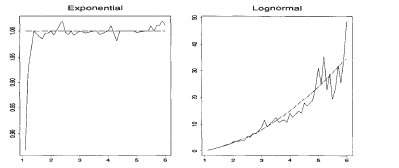
---

#### Implementation in Python

```python


In [12]:
import numpy as np

# Define the scaled squared error loss function
def scaled_squared_error_loss(lambda_true, delta, x):
    return ((delta - lambda_true)**2) / x**2

# Generate samples from Log-Normal distribution
def lognormal_samples(sample_size, mean=0, sigma=1):
    return np.random.lognormal(mean, sigma, sample_size)

# Importance sampling for exponential and log-normal comparison
def importance_sampling(sample_size, lambda_true, delta, sigma):
    # Generate Log-Normal samples
    samples = lognormal_samples(sample_size, 0, sigma)
    
    # Compute weights for Exp(1/lambda)
    weights_exp = (1 / lambda_true) * np.exp(-samples / lambda_true)
    
    # Evaluate risk under Exp(1/lambda)
    risk_exp = np.mean(weights_exp * scaled_squared_error_loss(lambda_true, delta, samples))
    
    # Evaluate risk under LN(0, sigma^2)
    risk_ln = np.mean(scaled_squared_error_loss(lambda_true, delta, samples))
    
    return risk_exp, risk_ln

# Example usage
lambda_true = 1.0
delta = 0.8
sigma = np.sqrt(np.log(1 + (1 / lambda_true)**2))
sample_size = 10000

risk_exp, risk_ln = importance_sampling(sample_size, lambda_true, delta, sigma)
print(f"Risk under Exp(1/lambda): {risk_exp:.6f}")
print(f"Risk under LN(0, sigma^2): {risk_ln:.6f}")


Risk under Exp(1/lambda): 0.112863
Risk under LN(0, sigma^2): 0.154979
